In [ ]:
#@title 1. Data Preprocessing
# 0. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Loading the Dataset
data = pd.read_csv('Netflix_Userbase.csv')

# 2. Missing Values
print(data.isnull().sum())

# 3. Encode Categorical Variables
dt_encoded = pd.get_dummies(data, drop_first=True)

# 4. Feature Selection
dt_encoded.head(1000)

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


,User ID,Monthly Revenue,Age,Subscription Type_Premium,Subscription Type_Standard,Join Date_01-05-23,Join Date_01-06-22,Join Date_01-07-22,Join Date_01-08-22,Join Date_01-09-22,...,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,1,10,28,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,2,15,35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,12,42,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,4,12,51,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,33,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,15,46,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
996,997,14,51,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
997,998,15,41,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
998,999,10,50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


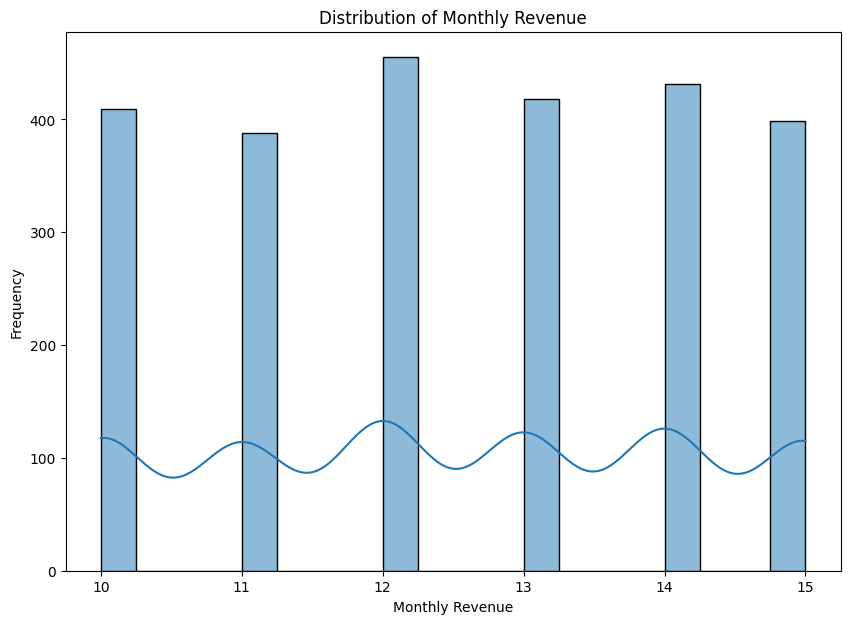

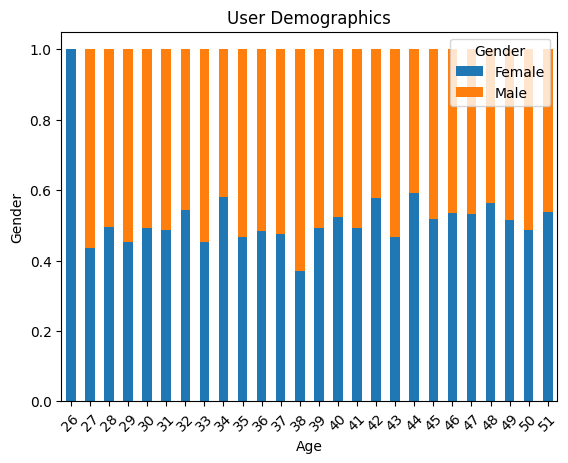

In [ ]:
#@title 2. Explanatory Data Analysis (EDA)
# 1. Descriptive Statistics
print(data.describe())

# 2. Visualizations
# Distribution of Monthly Income
plt.figure(figsize=(10, 7))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()


# User Demographics
UserDemo = data.groupby('Age')['Gender'].value_counts(normalize=True).unstack()
UserDemo.plot(kind='bar', stacked=True)
plt.title('User Demographics')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()





Slope:  -0.007171563890830623
Intercept:  13.906556148996602
R-squared: -0.17552958826823084
RMSE: 1.8019423146739808


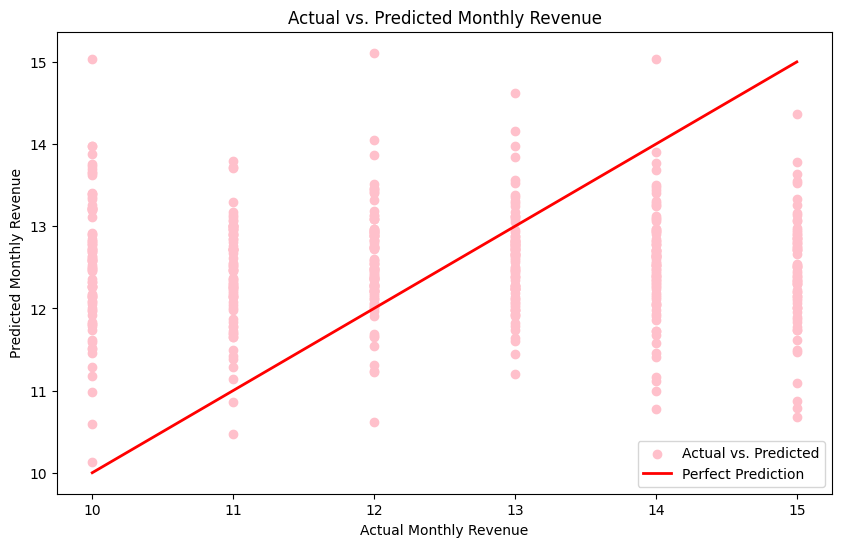

In [ ]:
#@title 3. Linear Regression Model (Predicting Monthly Revenue)
# 1. Build the Model
X = dt_encoded.drop(['User ID', 'Monthly Revenue'], axis=1)
y = dt_encoded['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

slope = Linear_model.coef_[0]
intercept = Linear_model.intercept_

print('Slope: ', slope)
print('Intercept: ', intercept)

# 2. Model Evaluation
y_pred = Linear_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("RMSE:", rmse)

# Visualizing the Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='pink', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Monthly Revenue')
plt.xlabel('Actual Monthly Revenue')
plt.ylabel('Predicted Monthly Revenue')
plt.legend()
plt.show()

In [ ]:
#@title  4: Logistic Regression Model (Predicting Customer Feedback)
#No feedback variable in the dataset

#Building the Model
X_linear = dt_encoded.drop(['User ID'], axis=1)
y_linear = dt_encoded['Age']
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

#Model Evaluation
y_pred_linear = linear_model.predict(X_test_linear)
r2 = r2_score(y_test_linear, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test_linear, y_pred_linear))
print("Model Evaluation for Age Prediction:")
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Model Evaluation for Age Prediction:
R-squared: 1.0
Root Mean Squared Error (RMSE): 1.1067145051377757e-14


                Feature  Coefficient
256  Join Date_27-02-23     1.854064
47   Join Date_05-09-21     1.852146
266  Join Date_27-11-22     1.829137
219  Join Date_23-03-23     1.622774
189  Join Date_20-01-23     1.622537
..                  ...          ...
210  Join Date_22-04-22    -3.482587
227  Join Date_23-11-21    -3.493425
230  Join Date_24-01-22    -3.532228
200  Join Date_21-04-22    -3.546946
103  Join Date_11-01-23    -3.727277

[340 rows x 2 columns]
                        Feature  Coefficient
0               Monthly Revenue     0.685203
97           Join Date_10-06-23     0.150735
319  Last Payment Date_22-06-23     0.149976
336       Country_United States     0.128497
2     Subscription Type_Premium     0.112975
..                          ...          ...
339           Device_Smartphone    -0.030914
340               Device_Tablet    -0.031684
3    Subscription Type_Standard    -0.036585
337                 Gender_Male    -0.062731
1                           Age    -0

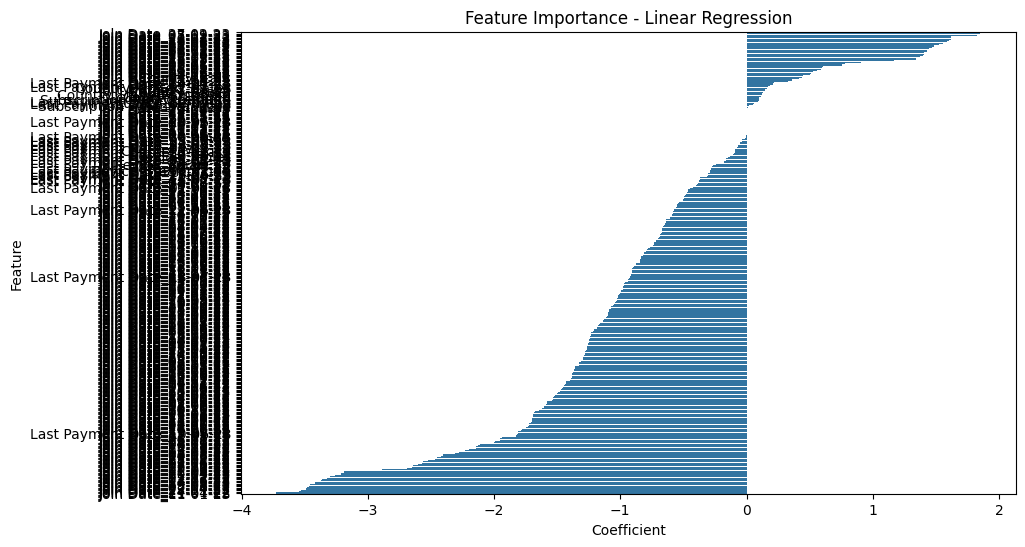

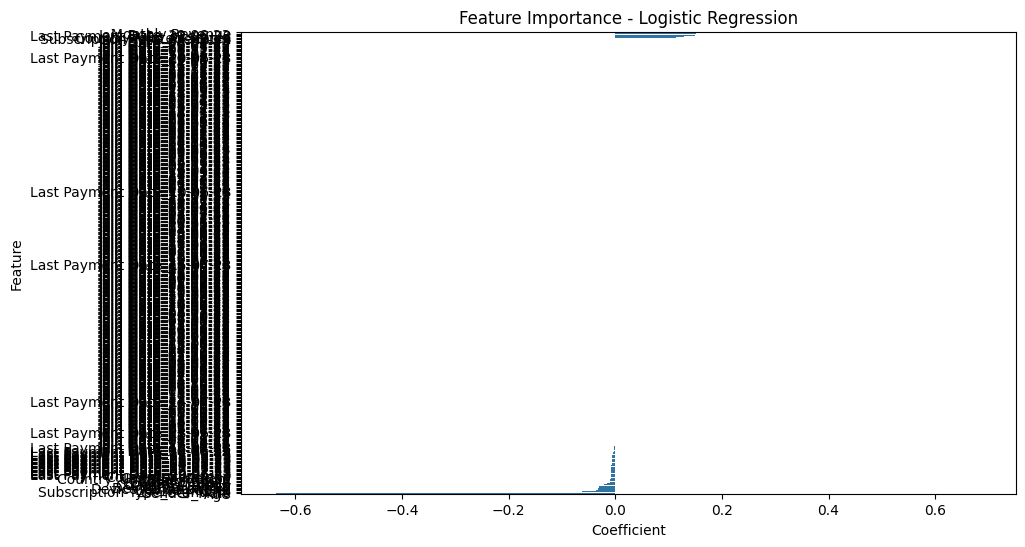


• FEATURE IMPORTANCE





In [ ]:
#@title 5: Comparative Analysis and Visualization
# Feature Importance for Linear Regression
Linear_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': Linear_model.coef_})
Linear_coefficients = Linear_coefficients.sort_values(by='Coefficient', ascending=False)
print(Linear_coefficients)

# Feature Importance for Logistic Regression
logistic_coefficients = pd.DataFrame({'Feature': X_logistic.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', ascending=False)
print(logistic_coefficients)

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=Linear_coefficients)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_coefficients)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Insights
print("""
FEATURE IMPORTANCE
I will say that number 4 Logistic Regressio Model (Predicting Customer Feedback) is not possible because there is no Feedback on the dataset given


""")